In [1]:
from sklearn import metrics    
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np 
from PIL import Image
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting 
# Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
import joblib
import sys


In [2]:
#Rock= 0
#Paper=1
#Scissor=2

In [3]:
path = 'images'
data1 = pd.DataFrame ()
data2= pd.DataFrame()
for folder in os.listdir(path):
    if folder == 'train':
    
        for f in os.listdir (path + '/' + folder):
            class_data = np.zeros ( (len(os.listdir (path + '/' + folder + '/' + f )), 1025) )
            print('Original shape')
            print (class_data.shape)
        
            for i, img_name in enumerate (os.listdir (path + '/' + folder + '/' + f )):

                img = Image.open (path + '/' + folder + '/' + f + '/' + img_name)
                img_arr = np.array (img, dtype = int)
                img_arr = img_arr.flatten()
                
                class_data [i, :1024] = img_arr
                class_data [i, 1024]  = int (f)  #assigning target to the last column 

            class_data = pd.DataFrame (class_data)
            data1 = pd.concat ([data1, class_data])
            print('Size after concatination')
            print(data1.shape)
    else:
        for f in os.listdir (path + '/' + folder):
            class_data = np.zeros ( (len(os.listdir (path + '/' + folder + '/' + f )), 1025) )
            print('Original shape')
            print (class_data.shape)
        
            for i, img_name in enumerate (os.listdir (path + '/' + folder + '/' + f )):

                img = Image.open (path + '/' + folder + '/' + f + '/' + img_name)
                img_arr = np.array (img, dtype = int)
                img_arr = img_arr.flatten()
                
                class_data [i, :1024] = img_arr
                class_data [i, 1024]  = int (f)  #assigning target to the last column 

            class_data = pd.DataFrame (class_data)
            data2 = pd.concat ([data2, class_data])
            print('Size after concatenation')
            print(data2.shape)

            
data1.to_csv ('train_game.csv')
data2.to_csv('test_game.csv')

            


Original shape
(662, 1025)
Size after concatination
(662, 1025)
Original shape
(638, 1025)
Size after concatination
(1300, 1025)
Original shape
(689, 1025)
Size after concatination
(1989, 1025)
Original shape
(363, 1025)
Size after concatenation
(363, 1025)
Original shape
(328, 1025)
Size after concatenation
(691, 1025)
Original shape
(365, 1025)
Size after concatenation
(1056, 1025)


In [4]:
data2.iloc[:,-1].unique()
data2.shape

(1056, 1025)

In [5]:

#checking target column

data1.iloc[:,-1].unique()
data1.shape

(1989, 1025)

In [6]:
X_tr = data1.iloc[:,:1024]
y_tr = data1.iloc[:,1024]

X_val = data2.iloc[:,:1024]
y_val = data2.iloc[:,1024]

In [7]:
scaler = StandardScaler()


data_norm_train = scaler.fit_transform(X_tr)
data_norm_test = scaler.transform(X_val)


In [8]:
#sns.histplot(data=data_norm, bins=10)

In [9]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost":      AdaBoostClassifier(),
  "Skl GBM":       GradientBoostingClassifier(),
  "Skl HistGBM":   GradientBoostingClassifier(),
  "XGBoost":       XGBClassifier(),
  "LightGBM":      LGBMClassifier(),
  "CatBoost":      CatBoostClassifier() 
}

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42, stratify=y_tr)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in tree_classifiers.items(): # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    start_time = time.time()
    model.fit(x_train, y_train)
    pred = model.predict(X_val)    # GET PREDICTIONS USING x_val
    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Confusion Matrix": confusion_matrix(y_val, pred),
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
    
                              
                              

 
# Your code goes here


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\Wojtek\anaconda3\envs\wojtek\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.081023
0:	learn: 1.0446304	total: 164ms	remaining: 2m 43s
1:	learn: 0.9936400	total: 197ms	remaining: 1m 38s
2:	learn: 0.9492302	total: 234ms	remaining: 1m 17s
3:	learn: 0.9080856	total: 273ms	remaining: 1m 8s
4:	learn: 0.8707053	total: 315ms	remaining: 1m 2s
5:	learn: 0.8405552	total: 352ms	remaining: 58.4s
6:	learn: 0.8132952	total: 389ms	remaining: 55.1s
7:	learn: 0.7850720	total: 427ms	remaining: 53s
8:	learn: 0.7572254	total: 467ms	remaining: 51.4s
9:	learn: 0.7341501	total: 504ms	remaining: 49.9s
10:	learn: 0.7146949	total: 539ms	remaining: 48.5s
11:	learn: 0.6938054	total: 578ms	remaining: 47.6s
12:	learn: 0.6720065	total: 617ms	remaining: 46.8s
13:	l

,Model,Accuracy,Bal Acc.,Time,Confusion Matrix
1,CatBoost,92.234848,92.178977,40.228263,[[337 8 18] [ 21 297 10] [ 13 12 340]]
2,Extra Trees,91.666667,91.623246,0.593945,[[342 17 4] [ 26 296 6] [ 21 14 330]]
3,Random Forest,91.098485,91.083590,0.504903,[[338 15 10] [ 25 297 6] [ 20 18 327]]
4,XGBoost,90.719697,90.633363,3.877081,[[333 18 12] [ 25 289 14] [ 19 10 336]]
5,LightGBM,90.246212,90.214427,0.848934,[[326 16 21] [ 26 293 9] [ 19 12 334]]
6,Skl HistGBM,87.878788,87.776291,9.346068,[[325 21 17] [ 33 278 17] [ 22 18 325]]
7,Skl GBM,87.689394,87.614247,9.334992,[[325 21 17] [ 32 280 16] [ 23 21 321]]
8,Decision Tree,80.303030,80.257010,0.114692,[[290 41 32] [ 35 259 34] [ 23 43 299]]
9,AdaBoost,72.916667,72.769875,1.185042,[[263 70 30] [ 79 225 24] [ 21 62 282]]


In [11]:
#Automatically choose the best model

# Your code goes here

#results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
#results_ord.index += 1 
#results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

best_model_string = results_ord.iloc[1,0]

In [12]:
#saving model


model = tree_classifiers[best_model_string]
model_choice = 'best_model_2.sav'
joblib.dump(model, model_choice)

['best_model_2.sav']

In [13]:
#loading model
loaded_model = joblib.load(model_choice)
result = loaded_model.score(X_val, y_val)
print(result)

0.9166666666666666


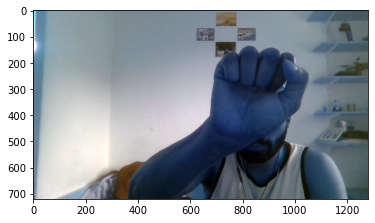

In [38]:
import cv2
import matplotlib.pyplot as plt

rawimage = cv2.imread(r'C:\Users\Wojtek\OneDrive\Desktop\STRIVE SCHOOL\WojtekRepo\GROUP PROJECT\ROCK SCISORS PAPER\Telegram Bot Project\Telegram Bot Project\Telegram Bot - Machine Learning\extra\rock_4.jpg')

plt.imshow(rawimage, cmap= 'gray')


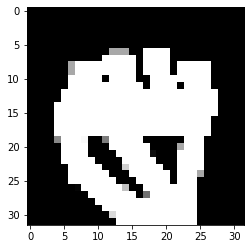

In [39]:
#Transform the Image into 32 x 32 skeleton using transform_image.py

sys.path.append(r"C:\Users\Wojtek\OneDrive\Desktop\STRIVE SCHOOL\WojtekRepo\GROUP PROJECT\ROCK SCISORS PAPER\Telegram Bot Project\Telegram Bot Project\Telegram Bot - Machine Learning\handgestures")
from handgestures.transform_image import transform_single_image


img = transform_single_image(rawimage)

plt.imshow(img, cmap="gray")




In [40]:
img.shape

(32, 32)

In [24]:
#TEMPORARY - REPLACE WITH IMPORTING FROM JOBLIB

model = tree_classifiers[results_ord.iloc[1,0]]
model


ExtraTreesClassifier()

In [41]:
#Transfrom the skeleton image into a flatenned array
img_arr = np.array(img, dtype = int)
img_arr = img_arr.flatten()
img_arr = img_arr.reshape(1,1024)





In [42]:
#Use the Chosen MACHINE LEARNING MODEL to classify the input


rps_input_predict = model.predict(img_arr)

print(rps_input_predict[0])

if int(rps_input_predict[0]) == 0:
    print("You choose ROCK!")
elif int(rps_input_predict[0]) == 1:
    print("You choose PAPER!")
else:
    print("You choose SCISSORS")

0.0
You choose ROCK!
